### Import Library


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Load Datasets
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/natalio123/FitGuard/main/data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Pregnancies: To express the Number of pregnancies
2. Glucose: To express the Glucose level in blood
3. BloodPressure: To express the Blood pressure measurement
4. SkinThickness: To express the thickness of the skin
5. Insulin: To express the Insulin level in blood
6. BMI: To express the Body mass index
7. DiabetesPedigreeFunction: To express the Diabetes percentage
8. Age: To express the age
9. Outcome: To express the final result 1 is Yes and 0 is No

#EDA

## Mendefinisikan Pertanyaan


1. Berapa banyak entri dalam dataset dan berapa proporsi dari masing-masing nilai Outcome (0 dan 1)?
2. Bagaimana Korelasi tiap Variabel?
3. Variabel apa yang memiliki korelasi paling tinggi dengan outcome?

## Accesing data and Cleaning


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes_df.duplicated().sum()

0

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Menghapus Outlier
numerical_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in numerical_columns:
    Q1 = diabetes_df[column].quantile(0.25)
    Q3 = diabetes_df[column].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    # Menentukan kondisi untuk outlier
    kondisi_lower_than = diabetes_df[column] < minimum
    kondisi_more_than = diabetes_df[column] > maximum

    # Menghapus outlier dari DataFrame
    diabetes_df.drop(diabetes_df[kondisi_lower_than].index, inplace=True)
    diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)

# Menampilkan DataFrame setelah menghapus outlier
max_min_summary = diabetes_df[numerical_columns].agg(['min', 'max']).transpose()

# Menampilkan hasil
print(max_min_summary)


                             min      max
Pregnancies                0.000   13.000
Glucose                   44.000  198.000
BloodPressure             38.000  106.000
SkinThickness              0.000   60.000
Insulin                    0.000  330.000
BMI                       18.200   49.600
DiabetesPedigreeFunction   0.078    1.162
Age                       21.000   65.000


<ipython-input-7-d7a90475a42a>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)
<ipython-input-7-d7a90475a42a>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)
<ipython-input-7-d7a90475a42a>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)


In [ ]:
diabetes_df['Pregnancies'].agg(['min', 'max'])

,Pregnancies
min,0
max,13


## Uji korelasi

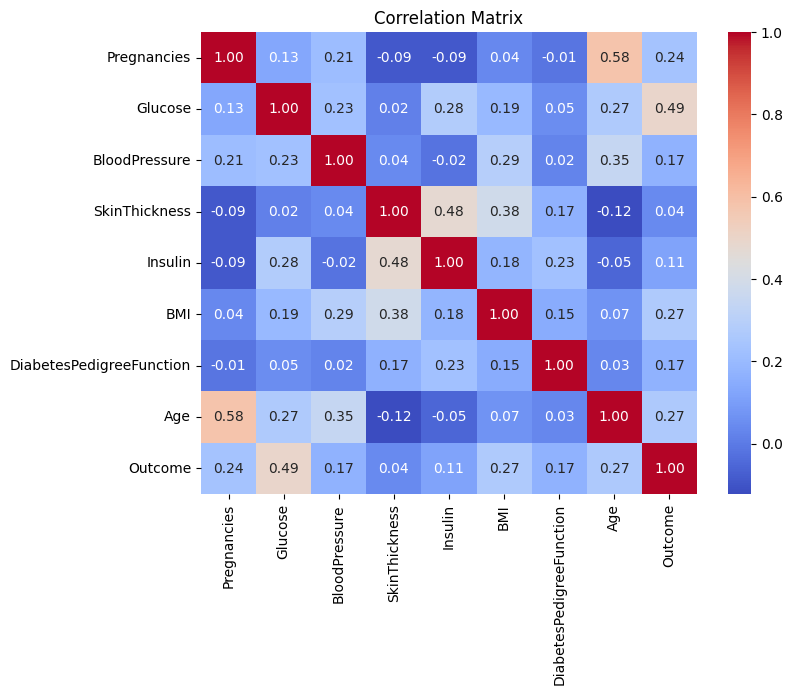

In [ ]:
correlation_matrix=diabetes_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
diabetes_df.groupby('Outcome').agg(
    Pregnancies_mean=('Pregnancies', 'mean'),
    Glucose_mean=('Glucose', 'mean'),
    BloodPressure_mean=('BloodPressure', 'mean'),
    SkinThickness_mean=('SkinThickness', 'mean'),
    Insulin_mean=('Insulin', 'mean'),
    BMI_mean=('BMI', 'mean'),
    DiabetesPedigreeFunction_mean=('DiabetesPedigreeFunction', 'mean'),
    Age_mean=('Age', 'mean'))


,Pregnancies_mean,Glucose_mean,BloodPressure_mean,SkinThickness_mean,Insulin_mean,BMI_mean,DiabetesPedigreeFunction_mean,Age_mean
Outcome,,,,,,,,
0,3.273349,109.293850,70.712984,20.312073,62.601367,30.817768,0.398658,30.610478
1,4.928934,140.208122,74.893401,21.710660,83.314721,34.518782,0.487695,36.888325


## Data Vizualitation and Explanatory analysis

### Data Visualitation

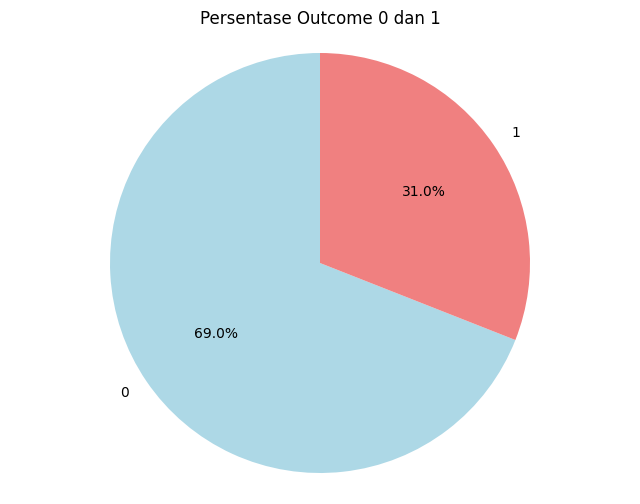

In [ ]:
# Menghitung jumlah untuk setiap nilai Outcome
outcome_counts = diabetes_df['Outcome'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Persentase Outcome 0 dan 1')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()

In [ ]:
# Menghitung jumlah orang yang terkena diabetes berdasarkan jumlah kehamilan
diabetes_by_pregnancies = diabetes_df[diabetes_df['Outcome'] == 1].groupby('Pregnancies').size()

# Menampilkan hasil
print(diabetes_by_pregnancies)

Pregnancies
0     24
1     20
2     12
3     23
4     17
5     17
6     12
7     21
8     16
9     14
10     9
11     5
12     4
13     3
dtype: int64


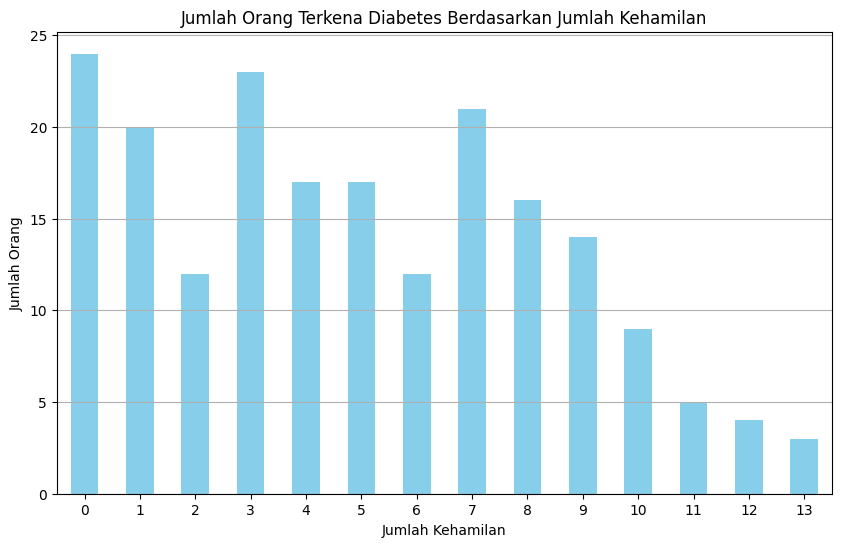

In [ ]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
diabetes_by_pregnancies.plot(kind='bar', color='skyblue')
plt.title('Jumlah Orang Terkena Diabetes Berdasarkan Jumlah Kehamilan')
plt.xlabel('Jumlah Kehamilan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=0)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')

# Menampilkan plot
plt.show()

<ipython-input-14-b319b9b6ba37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Outcome', y='Glucose', data=diabetes_df, jitter=True, palette='Set2', alpha=0.6)


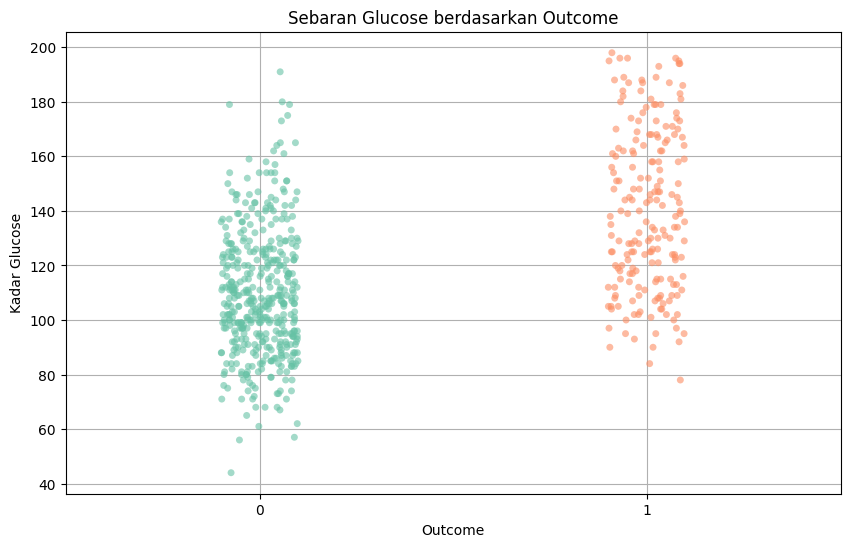

In [ ]:
# Membuat strip plot untuk Glucose berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.stripplot(x='Outcome', y='Glucose', data=diabetes_df, jitter=True, palette='Set2', alpha=0.6)
plt.title('Sebaran Glucose berdasarkan Outcome')
plt.xlabel('Outcome')
plt.ylabel('Kadar Glucose')
plt.grid(True)

# Menampilkan plot
plt.show()

### Explanatory Analysis

**Kesimpulan**
1. Variabel yang memiliki korelasi paling tinggi dengan Outcome (Hasil akhir, di mana 1 menunjukkan pasien menderita diabetes dan 0 menunjukkan pasien tidak menderita diabetes) adalah Glucose (kadar gula darah) dalam pasien.
2. Dan yang memiliki Korelasi paling rendah adalah SkinThickness: Ketebalan lipatan kulit triceps (mm).

**Saran**
1. Penting untuk mempertimbangkan apakah SkinThickness akan digunakan atau tidak
2. Penambahan data dalam dataset bila akurasi yang didapatkan cukup rendah

# Modelling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


**Pemisahan Dataset** <br>
Train dan Test,
80% data untuk train dan 20% untuk test.


In [ ]:
X = diabetes_df.drop(columns='Outcome', axis= 1)
y = diabetes_df['Outcome']

# fitur" yang digunakan disimpan di variabel `X` dan labelnya di `y`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Pemilihan Metode Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Dictionary for simpan model dan hasilnya
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Loop setiap model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.73      0.55      0.63        40

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128

Decision Tree Accuracy: 0.6953
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        88
           1       0.52      0.42      0.47        40

    accuracy                           0.70       128
   macro avg       0.64      0.62      0.63       128
weighted avg       0.68      0.70      0.69       128

Random Forest Accuracy: 0.7656
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        88
           1       0.68      0.47      0.56        40

    accuracy                           0.77       128
   macro avg       0.73      

Akurasi tertinggi ada di logistic regression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.796875
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.73      0.55      0.63        40

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128

Confusion Matrix:
 [[80  8]
 [18 22]]


**Pake Tensorflow**
<br>
ANN sebagai alternatif dari Logistic Regression

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout mencegah overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
]

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/200
12/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5768 - loss: 0.6866 
Epoch 1: val_accuracy improved from -inf to 0.72549, saving model to best_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6069 - loss: 0.6665 - val_accuracy: 0.7255 - val_loss: 0.5811
Epoch 2/200
22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7295 - loss: 0.5604
Epoch 2: val_accuracy improved from 0.72549 to 0.78431, saving model to best_model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7273 - loss: 0.5587 - val_accuracy: 0.7843 - val_loss: 0.5179
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.5107
Epoch 3: val_accuracy did not improve from 0.78431
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7427 - loss: 0.5106 - val_accuracy: 0.7843 - val_loss: 0.4835
Epoch 4/200
17/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.5030  
Epoch 4: val_accuracy improved from 0.78431 to 0.80392, saving model to best_model.

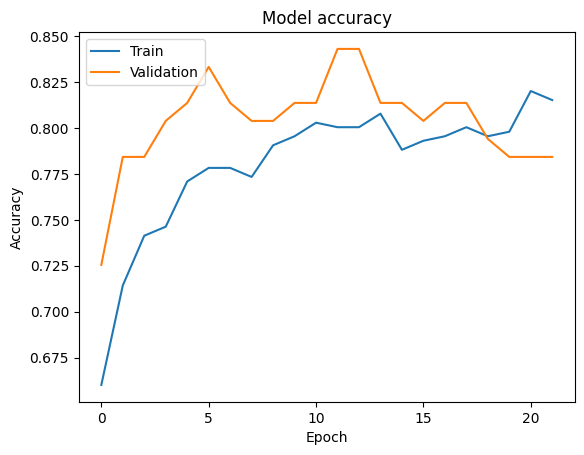

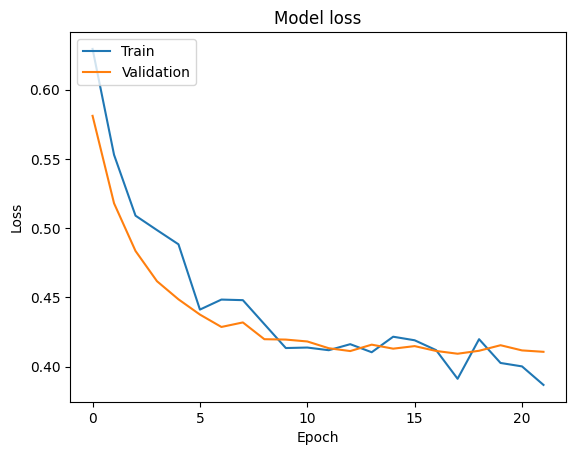

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


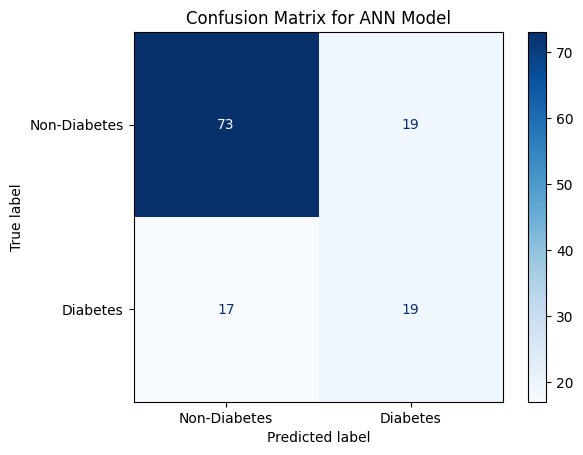

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for ANN Model")
plt.show()


In [ ]:
model.save('diabetes_prediction_model.h5')

# Model rekomendasi
**Pake Clustering K-Means**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']
# X = diabetes_df[features]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# diabetes_df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Analyze clusters to understand characteristics
# for i in range(kmeans.n_clusters):
#     print(f"\nCluster {i} Characteristics:")
#     print(diabetes_df[diabetes_df['Cluster'] == i][features].mean())

# # Step 4: Define Recommendations based on Cluster Characteristics
# def get_rekomendasi_nutrisi(cluster):
#     if cluster == 0:
#         return "Diet tinggi serat, rendah karbohidrat dengan protein sedang."
#     elif cluster == 1:
#         return "Diet rendah lemak, seimbang dengan kontrol asupan gula."
#     elif cluster == 2:
#         return "Fokus pada protein tanpa lemak, karbohidrat kompleks, dan hindari makanan dengan indeks glikemik tinggi."
#     else:
#         return "Diet seimbang secara umum."

# diabetes_df['Nutrition_Recommendation'] = diabetes_df['Cluster'].apply(get_rekomendasi_nutrisi)


# diabetes_df[['Glucose', 'BMI', 'Age', 'Cluster', 'Nutrition_Recommendation']].head()


In [ ]:
# # Menentukan centroid untuk interpretasi klaster
# centroids = kmeans.cluster_centers_
# print("Centroid setiap klaster:\n", centroids)

# # 2. Menyiapkan rekomendasi yang so tertulis sederhana berdasarkan centroid (sebagai contoh)
# recommendations = {
#     0: "Diet rendah gula dan tinggi serat untuk menjaga kadar gula dan berat badan.",
#     1: "Diet rendah indeks glikemik dan seimbang untuk menjaga kestabilan gula darah.",
#     2: "Diet penurunan berat badan yang kaya serat untuk menjaga stabilitas gula darah."
# }
# # Misal kita melatih K-Means dengan fitur: 'Glucose', 'BMI', 'Age', 'BloodPressure', dan 'SkinThickness'

# # Contoh data pasien dengan 5 fitur
# contoh_pasien1 = [150, 35.0, 50, 80, 20]  #input: [Glucose, BMI, Age, BloodPressure, SkinThickness]

# def rekomendasi(features):
#     # Memastikan data input memiliki 5 fitur
#     if len(features) != kmeans.n_features_in_:
#         raise ValueError(f"Expected {kmeans.n_features_in_} features, but got {len(features)}")

#     cluster_label = kmeans.predict([features])[0]
#     return recommendations[cluster_label]

# # Menguji fungsi dengan data lengkap
# print("Rekomendasi nutrisi:", rekomendasi(contoh_pasien1))


# Evaluation

**Evaluasi Model ANN Tensorflow**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [ ]:
# model.load_weights('diabetes_prediction_model.h5')
model.load_weights('best_model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7188


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
def rekomendasi_nutrisi(glucose, bmi, age):

    if glucose >= 140 or bmi >= 30:
        return "Diet rendah karbohidrat dengan serat tinggi dan protein moderat."
    elif age >= 50 and bmi < 25:
        return "Diet seimbang rendah lemak dengan kontrol gula."
    elif 25 <= bmi < 30:
        return "Fokus pada protein tanpa lemak, karbohidrat kompleks, dan hindari makanan GI tinggi."
    else:
        return "Diet seimbang yang umum."

# implementasi rekomendasi untuk data prediksi
for i in range(128):  # Hanya contoh untuk 5 pasien
    glucose = X_test[i][1]  # Mengambil fitur Glucose dari X_test
    bmi = X_test[i][5]      # Mengambil fitur BMI dari X_test
    age = X_test[i][7]      # Mengambil fitur Age dari X_test
    rekomendasi = rekomendasi_nutrisi(glucose, bmi, age)
    print(f"Pasien {i+1} Rekomendasi Nutrisi: {rekomendasi}")

Pasien 1 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 2 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 3 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 4 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 5 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 6 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 7 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 8 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 9 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 10 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 11 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 12 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 13 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 14 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 15 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 16 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 17 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 18 Rekomendasi Nutrisi: Diet seimbang yang umum.
P

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

diabetes_df['cluster'] = clusters

recommendations = {
   0: "Kurangin nasi, banyakin makan yang banyak proteinnya.",
   1: "Makannya dijaga, nasi dikit aja, sayur sama buah jangan lupa.",
   2: "Banyakin makan sayur sama buah, sama yang berserat kayak roti gandum."
}

# Assign recommendations to each cluster
diabetes_df['nutrition_recommendation'] = diabetes_df['cluster'].map(recommendations)

In [ ]:
def predict_and_recommend(new_data):

    new_data = new_data.rename(columns={
        'glucose': 'Glucose',
        'bmi': 'BMI',
        'age': 'Age'
    })


    for col in ['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness']:  # Add missing columns
        if col not in new_data.columns:
            new_data[col] = 0  # Or use other suitable values


    new_data = new_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Reorder columns

    new_data_scaled = scaler.transform(new_data)


    diabetes_risk = model.predict(new_data_scaled)
    diabetes_prediction = (diabetes_risk > 0.5).astype(int)


    new_clusters = kmeans.predict(new_data_scaled)
    recs = [recommendations[cluster] for cluster in new_clusters]


    for i, risk in enumerate(diabetes_prediction):
        print(f"Patient {i+1} - Diabetes Risk: {'Yes' if risk else 'No'}, Recommendation: {recs[i]}")

# Tes data pasien
new_patients = pd.DataFrame({
    'glucose': [120, 150, 200],
    'bmi': [28, 35, 300],
    'age': [50, 65, 45]
})

predict_and_recommend(new_patients)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Patient 1 - Diabetes Risk: No, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.
Patient 2 - Diabetes Risk: Yes, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.
Patient 3 - Diabetes Risk: Yes, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Test Accuracy: 0.7188
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        92
           1       0.50      0.53      0.51        36

    accuracy                           0.72       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.72      0.72      0.72       128



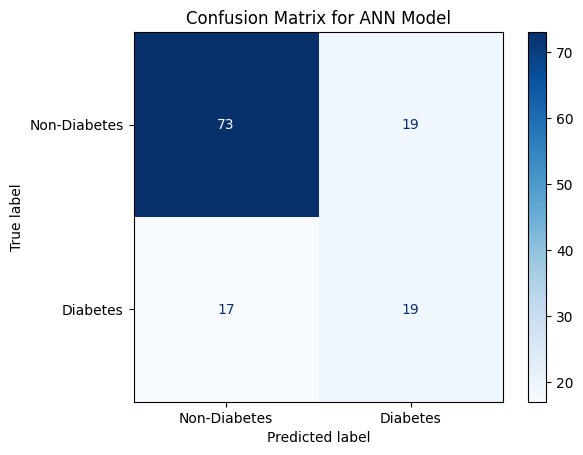

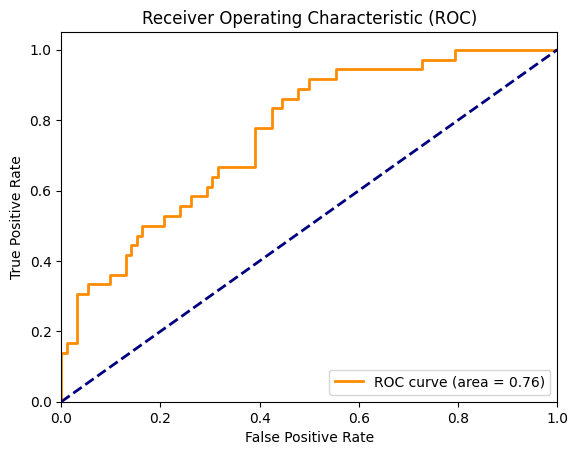

In [ ]:

model.load_weights('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for ANN Model')
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# You can also analyze other metrics like precision, recall, F1-score, etc.
# based on the classification report and confusion matrix.

In [ ]:
# kmeans = KMeans(n_clusters=3, random_state=42)
# diabetes_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# # Inisialisasi PCA dengan 2 komponen
# pca = PCA(n_components=2)

# # Transform data yang sudah di-scaling
# principalComponents = pca.fit_transform(X_scaled)

# # Buat DataFrame baru dengan principal components dan label kluster
# pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# pca_df['Cluster'] = diabetes_df['Cluster']

In [ ]:
# # Plot kluster dengan warna berbeda
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=pca_df, palette="viridis")
# plt.title('Visualisasi Kluster Diabetes dengan PCA')
# plt.show()

# Fine-Tuning


In [ ]:
search_callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True, min_delta=0.0001 ),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=2,min_lr=1e-6)
]

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True,min_delta=0.001),
    keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,patience=2,min_lr=1e-6,verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()

    # Layer pertama
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=1024, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],),
        kernel_regularizer=keras.regularizers.l2(0.01),
    ))

    # Dropout setelah layer pertama
    model.add(layers.Dropout(
        hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)
    ))

    # Layer kedua
    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=16, max_value=1024, step=16),
        activation='relu'
    ))

    # Dropout setelah layer kedua
    model.add(layers.Dropout(
        hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)
    ))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model





In [ ]:
# Random Search
# Inisialisasi tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Jumlah percobaan random yang akan dilakukan
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='fitGuard',
    overwrite=True
)

# Tampilkan ringkasan pencarian
tuner.search_space_summary()

# Lakukan pencarian
tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=search_callbacks
)

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Tampilkan hasil terbaik
print("Best hyperparameters:", tuner.get_best_hyperparameters()[0].values)

# Train model final dengan hyperparameter terbaik
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks= callbacks
)

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.843137264251709

Best val_accuracy So Far: 0.8627451062202454
Total elapsed time: 00h 04m 41s
Best hyperparameters: {'units_1': 576, 'dropout_1': 0.4, 'units_2': 272, 'dropout_2': 0.2, 'learning_rate': 0.0005397999520232943}
Epoch 1/100
13/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.4991
Epoch 1: val_accuracy did not improve from 0.87255
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8080 - loss: 0.4905 - val_accuracy: 0.8529 - val_loss: 0.4763 - learning_rate: 5.3980e-04
Epoch 2/100
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8149 - loss: 0.5006
Epoch 2: val_accuracy did not improve from 0.87255
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8130 - loss: 0.4958 - val_accuracy: 0.8431 - val_loss: 0.4762 - learning_rate: 5.3980e-04
Epoch 3/100
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.5068
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.397999775595963e-05.

Epoch

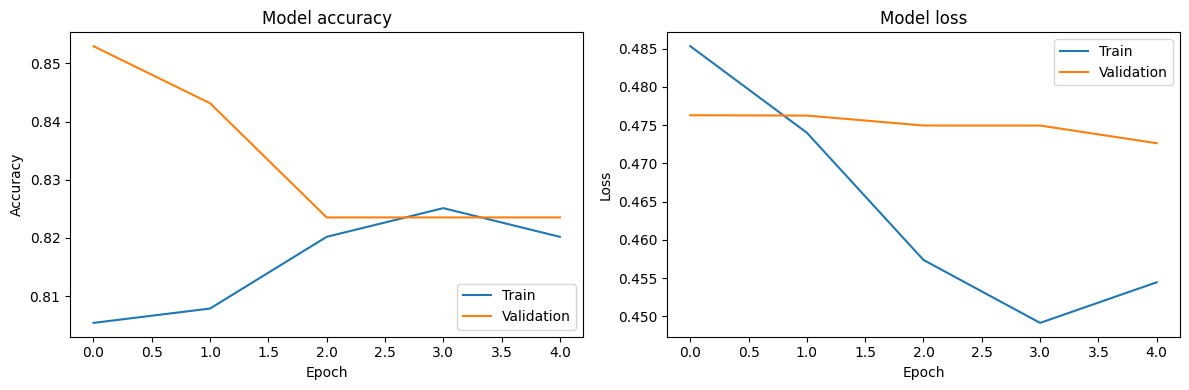

In [ ]:
# Plot hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Bayesian Optimization
# Inisialisasi BayesianOptimization tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Jumlah maksimum percobaan
    num_initial_points=3,  # Jumlah percobaan random sebelum memulai optimasi Bayesian
    alpha=0.0001,  # Parameter alpha untuk GPR
    beta=2.6,  # Parameter beta untuk ucb score
    directory='keras_tuner',
    project_name='fitGuard_bayesian',
    overwrite=True
)

# Tampilkan ringkasan pencarian
tuner.search_space_summary()

# Lakukan pencarian dengan Bayesian Optimization
tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks= search_callbacks
)

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Tampilkan hasil hyperparameter terbaik
print("\nBest hyperparameters:", tuner.get_best_hyperparameters()[0].values)

# Evaluasi performa model terbaik
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Train model final dengan hyperparameter terbaik
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks= callbacks
)

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.843137264251709

Best val_accuracy So Far: 0.8725489974021912
Total elapsed time: 00h 05m 04s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best hyperparameters: {'units_1': 864, 'dropout_1': 0.5, 'units_2': 720, 'dropout_2': 0.1, 'learning_rate': 0.006368104459833267}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6865 - loss: 0.6335  

Test accuracy: 0.7500
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8101 - loss: 0.4808
Epoch 1: val_accuracy did not improve from 0.87255
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8079 - loss: 0.4832 - val_accuracy: 0.8333 - val_loss: 0.4830 - learning_rate: 0.0064
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7876 - loss: 0.4630
Epoch 2: val_accuracy did not improve from 0.87255
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7877 - loss: 0.4658 - val_accuracy: 0.7745 - val_loss: 0.5002 - learning_rate: 0.0064
Epoch 3/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8072 - loss: 0.4735
Epoch 3: val_accuracy did not improve from 0.87255
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8062 - loss: 0.4730 - val_ac

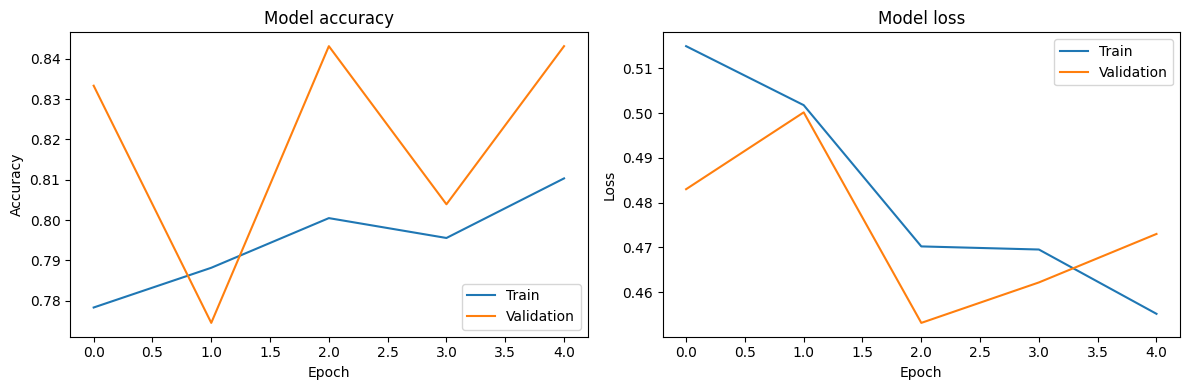

In [ ]:
# Plot hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
!pip install keras-tuner